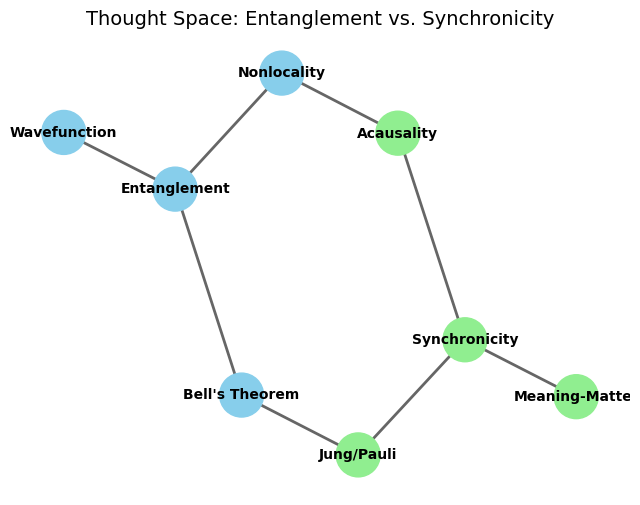

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()

# Blob A: Entanglement
entanglement_nodes = ["Entanglement", "Nonlocality", "Bell's Theorem", "Wavefunction"]
G.add_nodes_from(entanglement_nodes, group="entanglement")
G.add_edges_from([("Entanglement", "Nonlocality"),
                  ("Entanglement", "Bell's Theorem"),
                  ("Entanglement", "Wavefunction")])

# Blob B: Synchronicity
synchronicity_nodes = ["Synchronicity", "Acausality", "Jung/Pauli", "Meaning-Matter"]
G.add_nodes_from(synchronicity_nodes, group="synchronicity")
G.add_edges_from([("Synchronicity", "Acausality"),
                  ("Synchronicity", "Jung/Pauli"),
                  ("Synchronicity", "Meaning-Matter")])

# Cross-links (the metaphorical bridge)
cross_links = [("Nonlocality", "Acausality"),
               ("Bell's Theorem", "Jung/Pauli")]
G.add_edges_from(cross_links)

# Positioning
pos = nx.spring_layout(G, seed=42)

# Draw
plt.figure(figsize=(8,6))

colors = []
for node in G.nodes(data=True):
    if node[1]['group'] == "entanglement":
        colors.append("skyblue")
    else:
        colors.append("lightgreen")

nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=1000)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Thought Space: Entanglement vs. Synchronicity", fontsize=14)
plt.axis("off")
plt.show()


In [2]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Create graph
G = nx.Graph()

# Blob A: Entanglement
ent_nodes = ["Entanglement", "Nonlocality", "Bell's Theorem", "Wavefunction"]
G.add_nodes_from(ent_nodes, group="entanglement")
G.add_edges_from([("Entanglement", "Nonlocality"),
                  ("Entanglement", "Bell's Theorem"),
                  ("Entanglement", "Wavefunction")])

# Blob B: Synchronicity
syn_nodes = ["Synchronicity", "Acausality", "Jung/Pauli", "Meaning-Matter"]
G.add_nodes_from(syn_nodes, group="synchronicity")
G.add_edges_from([("Synchronicity", "Acausality"),
                  ("Synchronicity", "Jung/Pauli"),
                  ("Synchronicity", "Meaning-Matter")])

# Cross-links
cross_links = [("Nonlocality", "Acausality"),
               ("Bell's Theorem", "Jung/Pauli")]
G.add_edges_from(cross_links)

# Assign random 3D positions inside two blobs
np.random.seed(42)
pos = {}
for i, node in enumerate(ent_nodes):
    pos[node] = np.random.rand(3) * 5  # Blob A
for i, node in enumerate(syn_nodes):
    pos[node] = np.random.rand(3) * 5 + 6  # Blob B shifted in space

# Build edge traces
edge_x, edge_y, edge_z = [], [], []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z,
                          mode='lines',
                          line=dict(color='gray', width=3),
                          hoverinfo='none')

# Build node traces
node_x, node_y, node_z, node_text, node_color = [], [], [], [], []
for node, (x, y, z) in pos.items():
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_text.append(node)
    node_color.append('skyblue' if G.nodes[node]['group']=="entanglement" else 'lightgreen')

node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z,
                          mode='markers+text',
                          marker=dict(size=12, color=node_color),
                          text=node_text,
                          textposition="top center",
                          hoverinfo='text')

# Plot figure
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(title="Thought Space: Entanglement vs. Synchronicity (3D)",
                  scene=dict(xaxis=dict(showbackground=False),
                             yaxis=dict(showbackground=False),
                             zaxis=dict(showbackground=False)),
                  showlegend=False)
fig.show()


In [4]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np
from scipy.spatial import ConvexHull

# -----------------------------
# Create the graph
# -----------------------------
G = nx.Graph()

# Blob A: Entanglement
ent_nodes = ["Entanglement", "Nonlocality", "Bell's Theorem", "Wavefunction"]
G.add_nodes_from(ent_nodes, group="entanglement")
G.add_edges_from([("Entanglement", "Nonlocality"),
                  ("Entanglement", "Bell's Theorem"),
                  ("Entanglement", "Wavefunction")])

# Blob B: Synchronicity
syn_nodes = ["Synchronicity", "Acausality", "Jung/Pauli", "Meaning-Matter"]
G.add_nodes_from(syn_nodes, group="synchronicity")
G.add_edges_from([("Synchronicity", "Acausality"),
                  ("Synchronicity", "Jung/Pauli"),
                  ("Synchronicity", "Meaning-Matter")])

# Cross-links (metaphorical bridges)
cross_links = [("Nonlocality", "Acausality"),
               ("Bell's Theorem", "Jung/Pauli")]
G.add_edges_from(cross_links)

# -----------------------------
# Assign 3D positions for nodes
# -----------------------------
np.random.seed(42)
pos = {}
# Blob A
for i, node in enumerate(ent_nodes):
    pos[node] = np.random.rand(3) * 5
# Blob B
for i, node in enumerate(syn_nodes):
    pos[node] = np.random.rand(3) * 5 + 6  # shift in space

# -----------------------------
# Function to create a visible blob (convex hull with dummy points)
# -----------------------------
def make_blob(points, color='skyblue', opacity=0.2, expand=1.5):
    new_points = []
    for p in points:
        for _ in range(10):  # 10 dummy points per node
            offset = np.random.randn(3) * 0.5 * expand
            new_points.append(p + offset)
    all_points = np.vstack([points, new_points])
    hull = ConvexHull(all_points)
    x, y, z = all_points[:,0], all_points[:,1], all_points[:,2]
    mesh = go.Mesh3d(
        x=x[hull.vertices],
        y=y[hull.vertices],
        z=z[hull.vertices],
        color=color,
        opacity=opacity,
        alphahull=5
    )
    return mesh

# Create blobs
ent_points = np.array([pos[n] for n in ent_nodes])
syn_points = np.array([pos[n] for n in syn_nodes])
blob_ent = make_blob(ent_points, color='skyblue')
blob_syn = make_blob(syn_points, color='lightgreen')

# -----------------------------
# Create edges
# -----------------------------
edge_x, edge_y, edge_z = [], [], []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z,
                          mode='lines',
                          line=dict(color='gray', width=3),
                          hoverinfo='none')

# -----------------------------
# Create node markers
# -----------------------------
node_x, node_y, node_z, node_text, node_color = [], [], [], [], []
for node, (x, y, z) in pos.items():
    node_x.append(x)
    node_y.append(y)
    node_z.append(z)
    node_text.append(node)
    node_color.append('skyblue' if G.nodes[node]['group']=="entanglement" else 'lightgreen')

node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z,
                          mode='markers+text',
                          marker=dict(size=12, color=node_color),
                          text=node_text,
                          textposition="top center",
                          hoverinfo='text')

# -----------------------------
# Plot figure
# -----------------------------
fig = go.Figure(data=[blob_ent, blob_syn, edge_trace, node_trace])
fig.update_layout(title="Thought Space: Entanglement vs. Synchronicity (3D Blobs)",
                  scene=dict(xaxis=dict(showbackground=False),
                             yaxis=dict(showbackground=False),
                             zaxis=dict(showbackground=False)),
                  showlegend=False)
fig.show()
